# Feature Selection Test
The feature selection models were compared and analyzed by Naive Bayes Classifier.

We only choose ten most important features in each model for a test.

## Dataset Pre-processing

In [1]:
import os
from collections  import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [3]:
#the directory containing all of the relevant data files
dataset_root = '/Users/lila/Downloads/Data Science Toolbox/KDD'

In [4]:
current_path = %pwd

In [5]:
raw_data = os.path.join(dataset_root, 'kddcup.data_10_percent')

In [6]:
header_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type']

In [7]:
col_names = np.array(header_names)

nominal_idx = [1,2,3]
binary_idx = [6, 11,13,14,20, 21]
numeric_idx = list(set(range(41)).difference(nominal_idx).difference(binary_idx))

nominal_cols = col_names[nominal_idx].tolist()
binary_cols = col_names[binary_idx].tolist()
numeric_cols = col_names[numeric_idx].tolist()

In [8]:
category = defaultdict(list)
category[0].append('normal.')

In [9]:
with open(r'/Users/lila/Downloads/Data Science Toolbox/KDD/training_attack_types1.0.txt', mode = 'r', encoding = 'utf-8-sig') as f:
    for line in f.readlines():
        #print(line.strip().split(' '))
        attack, cat = line.strip().split(' ')
        cat = 1
        category[cat].append(attack)

attack_mapping = dict((v,k) for k in category for v in category[k])
print (attack_mapping)

{'normal.': 0, 'back.': 1, 'land.': 1, 'neptune.': 1, 'pod.': 1, 'smurf.': 1, 'teardrop.': 1, 'apache2.': 1, 'udpstorm.': 1, 'processtable.': 1, 'worm.': 1, 'satan.': 1, 'ipsweep.': 1, 'nmap.': 1, 'portsweep.': 1, 'mscan.': 1, 'saint.': 1, 'guess_passwd.': 1, 'ftp_write.': 1, 'imap.': 1, 'phf.': 1, 'multihop.': 1, 'warezmaster.': 1, 'warezclient.': 1, 'spy.': 1, 'xlock.': 1, 'xsnoop.': 1, 'snmpguess.': 1, 'snmpgetattack.': 1, 'httptunnel.': 1, 'sendmail.': 1, 'named.': 1, 'buffer_overflow.': 1, 'loadmodule.': 1, 'rootkit.': 1, 'perl.': 1, 'sqlattack.': 1, 'xterm.': 1, 'ps.': 1, 'mailbomb.': 1}


In [10]:
data_df = pd.read_csv(raw_data, names=header_names)
data_df['attack_category'] = data_df['attack_type'].map(lambda x: attack_mapping[x])

In [11]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler().fit(data_df[numeric_cols])
data_df[numeric_cols] = standard_scaler.transform(data_df[numeric_cols])

### Initial Classifier without feature selection

In [12]:
y = data_df['attack_category']
x = data_df[numeric_cols]

In [13]:
#Cross validation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
## Spliting of training dataset into 80% training data and 20% testing data randomly
features_train, features_test, labels_train, labels_test = train_test_split(x, y, test_size=0.2, random_state=42)

------------------------------------------
Accuracy =  98.46971307120084  %
[[19070   283]
 [ 1229 78223]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     19353
           1       1.00      0.98      0.99     79452

    accuracy                           0.98     98805
   macro avg       0.97      0.98      0.98     98805
weighted avg       0.99      0.98      0.98     98805



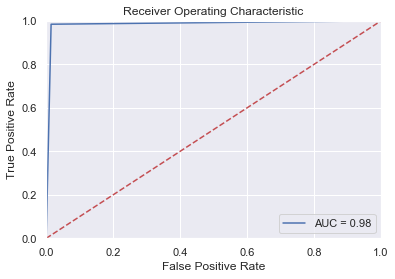

In [14]:
#Naive Bayes Classifier
from sklearn import metrics
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
clf = GaussianNB()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
acc=accuracy_score(prediction, labels_test)
print("------------------------------------------")
print("Accuracy = ",acc*100," %")
matrix = confusion_matrix(labels_test, prediction)
print(matrix)
report = classification_report(labels_test, prediction)
print(report)

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(labels_test, prediction)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [15]:
numeric_names = col_names[numeric_idx].tolist()
names = numeric_names

## Feature Selection Model


### Decision Tree

Applying Decision Tree to find important features. Higher the score more the important the attribute.

Then display the relative importance of each attribute.

In [16]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x, y)

print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 10), model.feature_importances_), names), reverse=True))

Features sorted by their score:
[(0.1471736939, 'dst_host_same_srv_rate'), (0.1413636532, 'dst_host_count'), (0.1350352011, 'dst_host_same_src_port_rate'), (0.1294156209, 'srv_count'), (0.0995472403, 'count'), (0.0754141917, 'dst_host_srv_count'), (0.0538226223, 'srv_rerror_rate'), (0.0468579194, 'dst_host_srv_serror_rate'), (0.0358161782, 'dst_host_serror_rate'), (0.022467816, 'serror_rate'), (0.0214880122, 'same_srv_rate'), (0.0134005873, 'dst_host_diff_srv_rate'), (0.0112980018, 'src_bytes'), (0.0109241628, 'hot'), (0.0108589785, 'rerror_rate'), (0.0081724524, 'srv_diff_host_rate'), (0.0076134367, 'dst_host_srv_diff_host_rate'), (0.0070687802, 'wrong_fragment'), (0.0056946575, 'num_compromised'), (0.0042328052, 'dst_host_rerror_rate'), (0.0039038832, 'dst_host_srv_rerror_rate'), (0.002973008, 'srv_serror_rate'), (0.0023416892, 'diff_srv_rate'), (0.0020203182, 'dst_bytes'), (0.0005387271, 'duration'), (0.0003471435, 'num_failed_logins'), (7.76251e-05, 'num_file_creations'), (7.58829e

In [17]:
x1 = data_df['count']
x2 = data_df['dst_host_same_src_port_rate']
x3 = data_df['srv_count']
x4 = data_df['dst_bytes']
x5 = data_df['dst_host_count']
x6 = data_df['same_srv_rate']
x7 = data_df['serror_rate']
x8 = data_df['dst_host_srv_count']
x9 = data_df['srv_rerror_rate']
x10 = data_df['dst_host_srv_serror_rate']

In [18]:
tree_x = pd.concat ([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10], axis=1)

In [19]:
# Cross validation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Spliting of training dataset into 80% training data and 20% testing data randomly
features_train, features_test, labels_train, labels_test = train_test_split(tree_x, y, test_size=0.2, random_state=42)

------------------------------------------
Accuracy =  98.11547998583067  %
[[18846   507]
 [ 1355 78097]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     19353
           1       0.99      0.98      0.99     79452

    accuracy                           0.98     98805
   macro avg       0.96      0.98      0.97     98805
weighted avg       0.98      0.98      0.98     98805



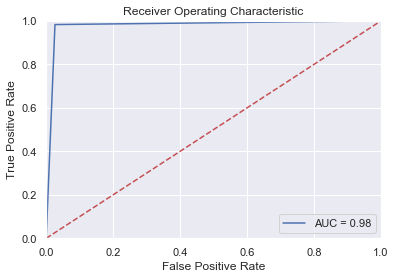

In [20]:
#Naive Bayes Classifier
from sklearn import metrics
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
clf = GaussianNB()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
acc=accuracy_score(prediction, labels_test)
print("------------------------------------------")
print("Accuracy = ",acc*100," %")
matrix = confusion_matrix(labels_test, prediction)
print(matrix)
report = classification_report(labels_test, prediction)
print(report)

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(labels_test, prediction)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Lasso

In [21]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)  
lasso.fit(x, y)  

print('Coefficient Matrix:\n',lasso.coef_)
l1_feature = lasso.coef_.tolist()
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 10), l1_feature), names), reverse=True))

Coefficient Matrix:
 [-0.00038441  0.          0.          0.0251885   0.          0.01835266
  0.          0.         -0.         -0.          0.         -0.
  0.          0.22329974  0.10959197  0.          0.02820534  0.
  0.02233619 -0.21185939 -0.00755206 -0.          0.02829842 -0.01456674
 -0.         -0.00646971  0.06597993  0.01936505  0.02828582  0.
  0.          0.        ]
Features sorted by their score:
[(0.2232997425, 'count'), (0.1095919679, 'srv_count'), (0.0659799301, 'dst_host_same_src_port_rate'), (0.028298424, 'dst_host_count'), (0.0282858213, 'dst_host_serror_rate'), (0.02820534, 'srv_serror_rate'), (0.0251884996, 'wrong_fragment'), (0.0223361901, 'srv_rerror_rate'), (0.0193650451, 'dst_host_srv_diff_host_rate'), (0.0183526563, 'hot'), (0.0, 'urgent'), (-0.0, 'srv_diff_host_rate'), (0.0, 'src_bytes'), (0.0, 'serror_rate'), (0.0, 'rerror_rate'), (0.0, 'num_shells'), (-0.0, 'num_root'), (0.0, 'num_outbound_cmds'), (-0.0, 'num_file_creations'), (0.0, 'num_failed_login

In [22]:
y1 = data_df['count']
y2 = data_df['srv_count']
y3 = data_df['dst_host_same_src_port_rate']
y4 = data_df['dst_host_count']
y5 = data_df['dst_host_serror_rate']
y6 = data_df['srv_serror_rate']
y7 = data_df['wrong_fragment']
y8 = data_df['srv_rerror_rate']
y9 = data_df['dst_host_srv_diff_host_rate']
y10 = data_df['hot']

In [23]:
lasso_x = pd.concat ([y1,y2,y3,y4,y5,y6,y7,y8,y9,y10], axis=1)

In [24]:
#Cross validation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
## Spliting of training dataset into 80% training data and 20% testing data randomly
features_train, features_test, labels_train, labels_test = train_test_split(lasso_x, y, test_size=0.2, random_state=42)

------------------------------------------
Accuracy =  97.46267901421993  %
[[19138   215]
 [ 2292 77160]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     19353
           1       1.00      0.97      0.98     79452

    accuracy                           0.97     98805
   macro avg       0.95      0.98      0.96     98805
weighted avg       0.98      0.97      0.98     98805



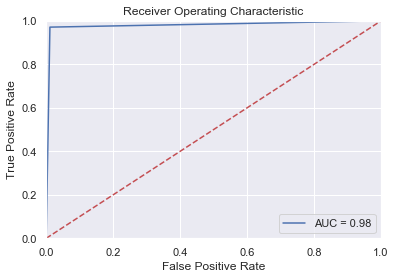

In [25]:
#Naive Bayes Classifier
from sklearn import metrics
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
clf = GaussianNB()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
acc=accuracy_score(prediction, labels_test)
print("------------------------------------------")
print("Accuracy = ",acc*100," %")
matrix = confusion_matrix(labels_test, prediction)
print(matrix)
report = classification_report(labels_test, prediction)
print(report)

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(labels_test, prediction)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Attribute Ratio(AR)

In [26]:
averages = data_df.loc[:, numeric_cols].mean()
averages_per_class = data_df[numeric_cols+['attack_category']].groupby('attack_category').mean()

AR = {}
for col in numeric_cols:
    AR[col] = max(averages_per_class[col])/averages[col]

The score of AR corresponds to the feature's importance. 

In [27]:
sorted(AR) 

['count',
 'diff_srv_rate',
 'dst_bytes',
 'dst_host_count',
 'dst_host_diff_srv_rate',
 'dst_host_rerror_rate',
 'dst_host_same_src_port_rate',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_count',
 'dst_host_srv_diff_host_rate',
 'dst_host_srv_rerror_rate',
 'dst_host_srv_serror_rate',
 'duration',
 'hot',
 'num_access_files',
 'num_compromised',
 'num_failed_logins',
 'num_file_creations',
 'num_outbound_cmds',
 'num_root',
 'num_shells',
 'rerror_rate',
 'same_srv_rate',
 'serror_rate',
 'src_bytes',
 'srv_count',
 'srv_diff_host_rate',
 'srv_rerror_rate',
 'srv_serror_rate',
 'urgent',
 'wrong_fragment']

In [28]:
z1 = data_df['count']
z2 = data_df['diff_srv_rate']
z3 = data_df['dst_bytes']
z4 = data_df['dst_host_count']
z5 = data_df['dst_host_diff_srv_rate']
z6 = data_df['dst_host_rerror_rate']
z7 = data_df['dst_host_same_src_port_rate']
z8 = data_df['dst_host_same_srv_rate']
z9 = data_df['dst_host_srv_count']
z10 = data_df['hot']

In [29]:
ar_x = pd.concat ([z1,z2,z3,z4,z5,z6,z7,z8,z9,z10], axis=1)

In [30]:
#Cross validation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
## Spliting of training dataset into 80% training data and 20% testing data randomly
features_train, features_test, labels_train, labels_test = train_test_split(ar_x, y, test_size=0.2, random_state=42)

------------------------------------------
Accuracy =  98.02439147816406  %
[[18950   403]
 [ 1549 77903]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     19353
           1       0.99      0.98      0.99     79452

    accuracy                           0.98     98805
   macro avg       0.96      0.98      0.97     98805
weighted avg       0.98      0.98      0.98     98805



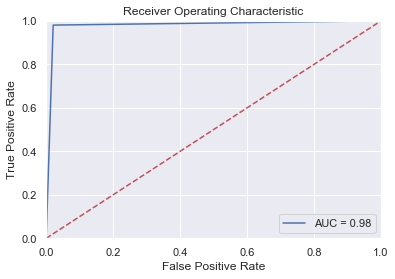

In [31]:
#Naive Bayes Classifier
from sklearn import metrics
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
clf = GaussianNB()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
acc=accuracy_score(prediction, labels_test)
print("------------------------------------------")
print("Accuracy = ",acc*100," %")
matrix = confusion_matrix(labels_test, prediction)
print(matrix)
report = classification_report(labels_test, prediction)
print(report)

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(labels_test, prediction)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()